In [1]:
from settings import *
import matplotlib.pyplot as plt
import numpy as np

random_rho0s: setting seed=57829


In [2]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

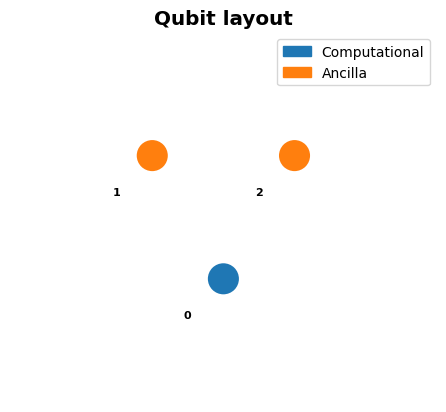

In [3]:
qubits.show_layout()

In [4]:
# theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

# np.save("both_theta_opt", theta_opt)
# np.save("both_thetas", thetas)
# np.save("both_errors", errors)

optimizer (optimization indices): setting seed=13980


C:\BFP\quantum-channel-approximation\q_lab_toolbox\optimizer.py:191: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Current gradient term: [ 7.54024888e-03  1.38777878e-15  4.16333634e-15 -4.29154885e-02
 -1.75533134e-02 -1.75533134e-02  4.37676724e-02 -4.39950788e-02
 -4.39950788e-02  3.51662899e-03  4.37676724e-02 -4.39950788e-02
 -4.39950788e-02 -7.26274703e-02 -5.22370101e-04 -5.22370101e-04
 -3.00651277e-02 -7.28362499e-03 -7.28362499e-03  5.55640552e-02
 -3.00651277e-02 -7.28362499e-03 -7.28362499e-03 -9.35965417e-02
 -3.82987683e-02 -3.82987683e-02  2.93239777e-02 -1.37429983e-02
 -1.37429983e-02 -7.95021852e-02  2.93239777e-02 -1.37429983e-02
 -1.37429983e-02 -5.79493448e-02 -1.01054569e-02 -1.01054569e-02
 -5.12126152e-02 -3.13324361e-02 -3.13324361e-02  1.46923660e-01
 -5.12126152e-02 -3.13324361e-02 -3.13324361e-02  1.13463641e-02
 -1.96678995e-02 -1.96678995e-02 -1.80440338e-02 -1.38777878e-15
  1.38777878e-15  5.02067258e-02] 
            Current error: 0.21111231008386236 
            Current sigma values: (1, 0, 10)
Iteration: 10 
            Current gradient

In [5]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

rho_rand_haar: seed=49938


c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

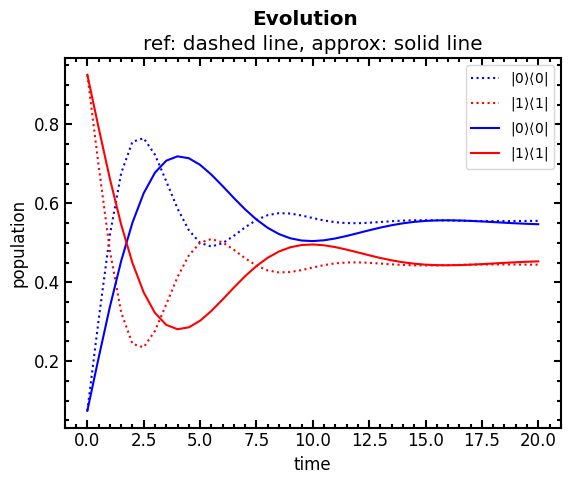

In [6]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_readout_computational_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=computation_basis_labels(1))

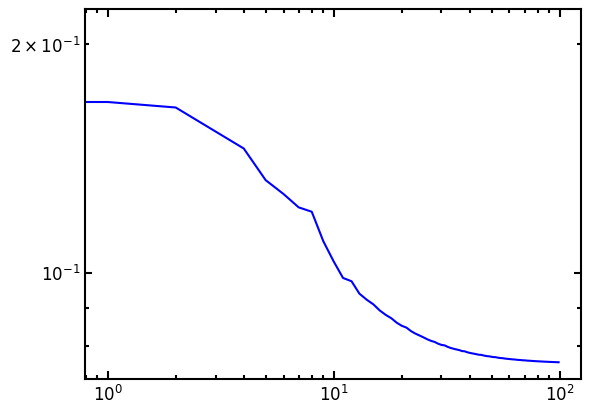

In [7]:
plt.loglog(errors)